In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

%matplotlib inline

# The random walker

## Brownian Motion with a Drift

In lecture, we have seen the random walk described by

$$dS = \mu dt + \sigma \epsilon \sqrt{dt}.$$

When coding, we need to translate this to discrete timesteps, which amounts to 

$$\Delta S_t = \mu + \sigma z_t,$$

where $z_t$ is a random normal variable with mean 0 and standard deviation 1. 

### Visualizing the two dimensional random walker

In this first example, we are going to simulate a two-dimensional random walker, like in the very first graph we have seen in the lecture slides and which we are now going to recreate. 

At each time step, our x- and y-coordinates are given as $X_t$ and $Y_t$, and we change them by a deterministic amount $\mu$ and a random amount $\sigma z_t^X$ and $\sigma z_t^Y$, respectively.


The position of our random walker at any given point $T$ is obtained by considering its initial position $(X_0, Y_0)$ and summing up all the changes until that point:

$$X_T = X_0 + \sum_{t=1}^T \Delta X_t,$$

and likewise for $Y_T$. Below, you find the annotated code to realize this.

X position: 96.66548467718931
Y position: 106.17600660547429


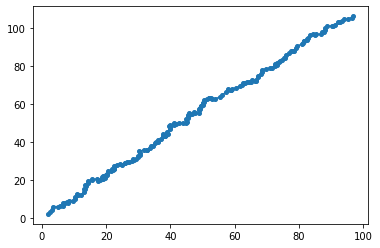

In [36]:
# Set the parameters and initial condition for the random walk.
mu = 0.5
sigma = 0.5
X0 = 2.0
Y0 = 2.0
T = 200
# Create T random time steps from a normal distribution.
X = np.random.normal(0, 1, T)
Y = np.random.normal(0, 1, T)

# Insert the first step into the array and then sum up to find position 
# after each step.
X_pos = [X0]
Y_pos = [Y0]

for t in range(0,T):
    X_pos.append(X_pos[t] + mu + sigma*X[t])
    Y_pos.append(Y_pos[t] + mu + sigma*Y[t])

# Plot the random walk
plt.plot(X_pos, Y_pos, "o-", markersize=4)

# Output the position of the walker after 100 steps
print ("X position:", X_pos[-1])
print ("Y position:", Y_pos[-1])

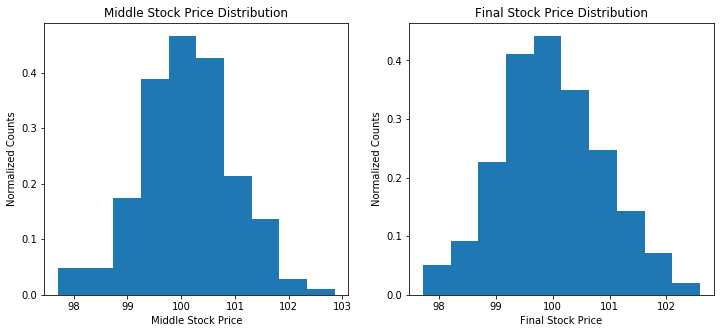

In [34]:
# TODO: Also get the stock prices at the middle and 
# plot the histogram for those as well

def simulate_geometric_randwalk(S_0, mu, sigma, num_steps, plot=True):
    '''Given the parameters mu and sigma,
       num_steps and the initial value S_0,
       generate a random walk following
       geometric Brownian Motion.'''
    S = np.zeros(num_steps+1)
    # Initial value of the stock price
    S[0] = S_0
    # Generate random values from Gaussian distribution
    # for each iteration step
    rand_vals = np.random.normal(0,1,num_steps)
    for idx in range(num_steps):
        # Calculate the change in the iteration step
        # according to geometric Brownian motion
        delta_S = mu*S[idx] + sigma*rand_vals[idx]*S[idx] 
        S[idx+1] = S_0 + delta_S
    
    # Plot the resulting stock prices, if requested
    if plot:
        ax = plt.subplot(1,1,1)
        ax.plot(S)
        ax.set_xlabel('Iteration step')
        ax.set_ylabel(r'Stock price, $S$')
        ax.grid(True)
    
    # Return the stock prices in the middle and 
    # after all the iteration steps
    return S[num_steps//2], S[-1]

S_0 = 100
mu = 0.08/252
sigma = 0.14/np.sqrt(252)
num_steps = 504

#S_final = simulate_geometric_randwalk(S_0=S_0, mu=mu, sigma=sigma, num_steps=num_steps)
#print(f'Initial stock price : {S_0}')
#print(f'Final stock price : {S_final:.3f}')
    
def create_hist_stockprices(num_iter, S_0, mu, sigma, num_steps):
    '''Generate random walk for num_iter times,
       plot the final stock prices as a histogram.'''
    middle_price_arr = np.zeros(num_iter)
    final_price_arr = np.zeros(num_iter)
    for idx in range(num_iter):
        middle_price_arr[idx], final_price_arr[idx] = simulate_geometric_randwalk( S_0=S_0, 
                                                                                   mu=mu, 
                                                                                   sigma=sigma, 
                                                                                   num_steps=num_steps, 
                                                                                   plot=False)
    
    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    label = r'$\mu=\frac{0.08}{252}$, $\sigma=\frac{0.28}{\sqrt{252}}$'
    
    ax1.hist(middle_price_arr, density=True)
    ax1.set_xlabel('Middle Stock Price')
    ax1.set_ylabel('Normalized Counts')
    ax1.set_title('Middle Stock Price Distribution')
    
    ax2.hist(final_price_arr, density=True) 
    ax2.set_xlabel('Final Stock Price')
    ax2.set_ylabel('Normalized Counts')
    ax2.set_title('Final Stock Price Distribution')
    if not os.path.exists('./output'):
        os.mkdir('output')
    fig.savefig(f'./output/stock_price_dist_sigma_0_14.pdf')

# Number of iterations for stock price simulation
num_iter = 200

create_hist_stockprices(num_iter=num_iter, 
                        S_0=S_0, 
                        mu=mu, 
                        sigma=sigma, 
                        num_steps=num_steps)

In [13]:
np.arange(97,103,0.5)

array([ 97. ,  97.5,  98. ,  98.5,  99. ,  99.5, 100. , 100.5, 101. ,
       101.5, 102. , 102.5])

### Distribution of the walker's final position

We invoke the central limit theorem: If we look at how summed up random variables are distributed, then we are going to find the normal distribution for sufficiently large $N$.

Let's see how this happens for our random walker. We are going to set $T=100$, the number of steps to take. Then we are going to collect the last position of each random walker in terms of $(X_T, Y_T)$. Finally, we plot the histograms of both.

Mean of final X position: 2.012948604774527
Mean of final Y position: 2.0075255217087484


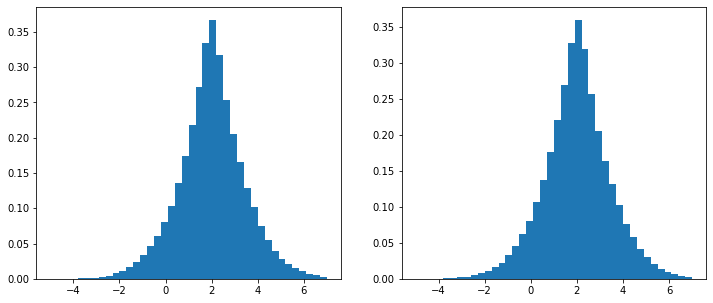

In [14]:
# Variable to keep track of our final positions
final_positions = []

# For-Loop to run the walker from the same initial conditions
# over and over again.
for run in range(5000):
    mu = 0.0
    sigma = 0.2
    X0 = 2.0
    Y0 = 2.0
    T = 100

    # Create T random time steps from a normal distribution.
    X = np.random.normal(0, 1, T)
    Y = np.random.normal(0, 1, T)

    # Insert the first step into the array and then sum up to find position 
    # after each step.
    X_pos = [X0]
    Y_pos = [Y0]

    for t in range(T):
        X_pos.append(X_pos[t] + mu + sigma*X[t])
        Y_pos.append(Y_pos[t] + mu + sigma*Y[t])

        # Append to the end of our list of the final positions
        # the respective last positions of X and Y.
        final_positions.append([X_pos[-1], Y_pos[-1]])

# The variable final_positions is a list, but we prefer a numpy array
final_positions = np.array(final_positions)

# final_position is now a 2-dimensional array.
# One dimension is X and Y, and the other is the 5000 runs.
X_final = final_positions[:, 0]
Y_final = final_positions[:, 1]

# We're plotting a histogram for the final position to identify the distribution.
# Sometimes it's useful to create subplots to put two plots next to each other:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# We use 41 bins spanning from -5 to 7, and we tell pyplot to return the PDF, not the counts.
ax1.hist(X_final, bins=np.linspace(-5,7,41), density=True);
print("Mean of final X position:", np.mean(X_final))
ax2.hist(Y_final, bins=np.linspace(-5,7,41), density=True);
print("Mean of final Y position:", np.mean(Y_final))

#### Problem 1.

See if you can find the relationship

$$\langle x_t^2\rangle = 2Dt$$

where $t$ is the number of steps.

## Stock Prices & Brownian Motion.

#### Problem 2. 
Use 

$$\Delta S_t = \mu + \sigma z_t$$ 

to simulate "stock prices" for 100 time steps. Initialize them with $S_0 = 100$ and try out different parameters. Plot your results.


RESULTS:
Initial stock price: 100.000
Final stock price: 119.704


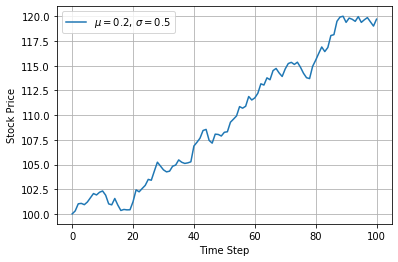

In [31]:
T = 100
mu = 0.2 # drift parameter
sigma = 0.5
S_0 = 100
stock_prices = np.zeros(T+1)
stock_prices[0] = S_0

# Pick T random walks from the normal distribution
z = np.random.normal(0,1,T)

for i in range(T):
    add_term = stock_prices[i] + mu + sigma*z[i]
    stock_prices[i+1]= add_term

fig, ax = plt.subplots(1,1)
legend_label = r'$\mu = {mu}$, $\sigma = {sigma}$'.format(mu=mu, sigma=sigma)
ax.plot(stock_prices, label=legend_label)
ax.set_ylabel('Stock Price')
ax.set_xlabel('Time Step')
ax.grid(True)
plt.legend()

print('RESULTS:')
print('Initial stock price: %.3f' % stock_prices[0])
print('Final stock price: %.3f' % stock_prices[-1])


# Central Limit Theorem

Consider $N$ variables $x_n$ whose distributions $p_n(x_n)$ have finite moments which are confined as $N$ grows. Then, the distribution of the scaled variable $y=\frac{1}{\sqrt{N}}\sum_n x_n$ converges for large $N$, independent of the particular functional form of the distributions $p_n(x_n)$, to a Gaussian whose variance is given by the mean second moment of the distributions $p_n(x_n)$.

#### Problem 3.

Test the central limit theorem by testing out various distributions, such as the normal distribution, the log-normal distribution, Student's t-distribution, and the Cauchy distribution. Plot histograms to make your point.

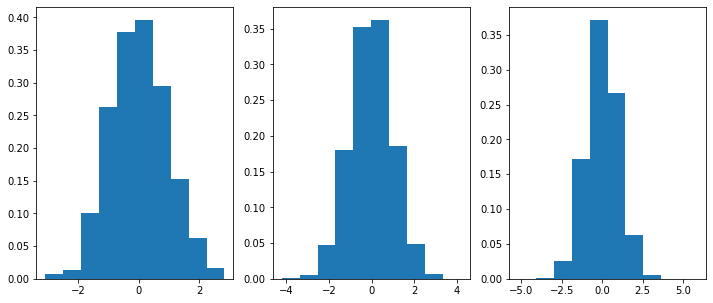

In [35]:
def plot_normal_dist(num_samples_list):
    '''Given a list of number of samples to be drawn from, plot normal distribution.'''
    fig, axes = plt.subplots(1,3,figsize=(12,5))
    for idx,  num_samples in enumerate(num_samples_list):
        # Draw from the normal distribution
        dist = np.random.normal(0, 1, int(num_samples))
        axes[idx].hist(dist, density=True)
        
num_samples_list = [1e3, 1e5, 1e7]

plot_normal_dist(num_samples_list)